#Кейс "Бои без правил"

##Подключение библиотек/чтение файла

In [238]:

import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('https://raw.githubusercontent.com/zalig/cu-datasets/main/without_rules.csv')

##Создание выборок

In [239]:
#Создаем столбцы
df['Selection winner A'] = 0
df['Selection winner B'] = 0

###Победа А

In [240]:
#создаем датафреймы с клиентами по возрастным группам
df_A_24 = df[(df['Age']=='<25')&(df['Subscription']=='A')]
df_A_25 = df[(df['Age']=='25+')&(df['Subscription']=='A')]

df_B_24 = df[(df['Age']=='<25')&(df['Subscription']=='B')]
df_B_25 = df[(df['Age']=='25+')&(df['Subscription']=='B')]


#подбираем выборки
sample_A = pd.concat([df_A_24[(df_A_24['Videos Watched']>130)&(df_A_24['Gender']=='Male')].head(85),df_A_24[(df_A_24['Videos Watched']>130)&(df_A_24['Gender']=='Female')].head(100)
,df_A_25[(df_A_25['Videos Watched']>40)&(df_A_25['Gender']=='Male')].head(3), df_A_25[(df_A_25['Videos Watched']>40)&(df_A_25['Gender']=='Female')].head(12)])
sample_B = pd.concat([df_B_24[(df_B_24['Videos Watched']<130)&(df_B_24['Gender']=='Male')].head(19),df_B_24[(df_B_24['Videos Watched']<130)&(df_B_24['Gender']=='Female')].head(40)
                      ,df_B_25[(df_B_25['Videos Watched']<40)&(df_B_25['Gender']=='Male')].head(69),df_B_25[(df_B_25['Videos Watched']<40)&(df_B_25['Gender']=='Female')].head(72)])


#заполняем столбец selection_winner_a

df_A_wins = pd.concat([sample_A,sample_B])

column_values = df_A_wins['Id'].values

for i in column_values:
  df.loc[df['Id'] == i, 'Selection winner A'] = 1



###Победа В

In [241]:
#создаем датафреймы с клиентами по возрастным группам
df_A_24 = df[(df['Age']=='<25')&(df['Subscription']=='A')]
df_A_25 = df[(df['Age']=='25+')&(df['Subscription']=='A')]

df_B_24 = df[(df['Age']=='<25')&(df['Subscription']=='B')]
df_B_25 = df[(df['Age']=='25+')&(df['Subscription']=='B')]


#подбираем выборки
sample_A = pd.concat([df_A_24[(df_A_24['Videos Watched']<130)&(df_A_24['Gender']=='Male')].head(21),df_A_24[(df_A_24['Videos Watched']<130)&(df_A_24['Gender']=='Female')].head(50)
,df_A_25[(df_A_25['Videos Watched']<38)&(df_A_25['Gender']=='Male')].head(67), df_A_25[(df_A_25['Videos Watched']<130)&(df_A_25['Gender']=='Female')].head(62)])


sample_B = pd.concat([df_B_24[(df_B_24['Videos Watched']>130)&(df_B_24['Gender']=='Male')].head(86),df_B_24[(df_B_24['Videos Watched']>130)&(df_B_24['Gender']=='Female')].head(100)
                      ,df_B_25[(df_B_25['Videos Watched']>40)&(df_B_25['Gender']=='Female')].head(12), df_B_25[(df_B_25['Videos Watched']>38)&(df_B_25['Gender']=='Male')]])


#заполняем столбец selection_winner_b

df_B_wins = pd.concat([sample_A,sample_B])

column_values = df_B_wins['Id'].values

for i in column_values:
  df.loc[df['Id'] == i, 'Selection winner B'] = 1

##Синий уровень

###Победа А

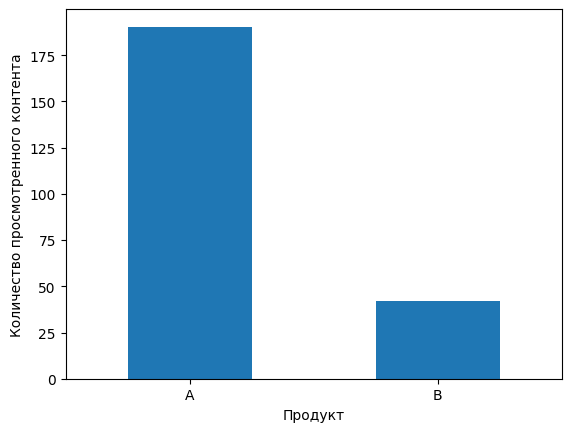

In [253]:
#Слайд 1


#рисуем график
table_mean_1 = pd.pivot_table(df_A_wins,values='Videos Watched',index='Subscription', aggfunc='mean')
table_mean_1.plot(kind = 'bar', ylabel = 'Количество просмотренного контента', xlabel='Продукт', legend = False)

plt.xticks(rotation=0)
plt.show()


###Победа В

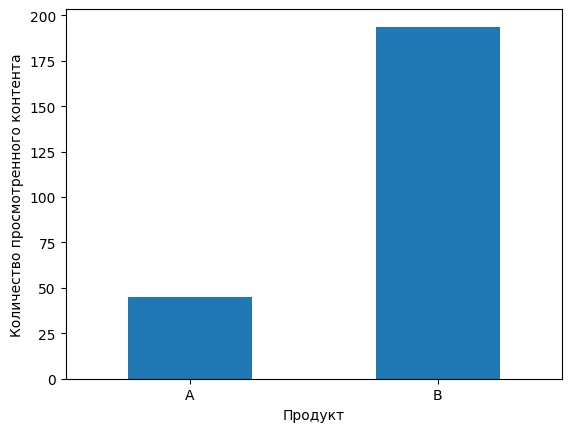

In [254]:
#Слайд 2


#рисуем график
table_mean_2 = pd.pivot_table(df_B_wins,values='Videos Watched',index='Subscription', aggfunc='mean')
table_mean_2.plot(kind = 'bar', ylabel = 'Количество просмотренного контента', xlabel='Продукт', legend = False)

plt.xticks(rotation=0)
plt.show()

##Красный уровень

###Победа А

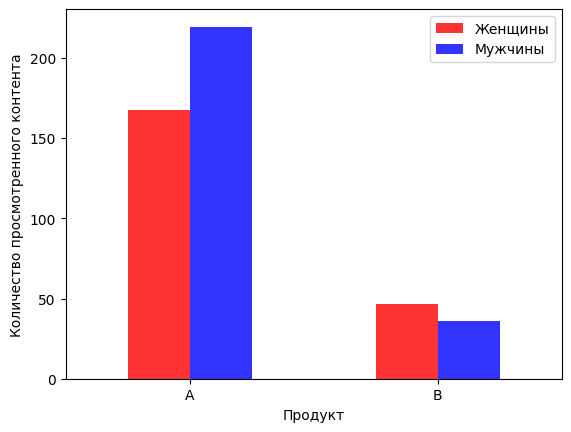

In [255]:
#Слайд 1


#рисуем график
table_mean_1 = pd.pivot_table(df_A_wins,values='Videos Watched',index='Subscription',columns='Gender', aggfunc='mean')
table_mean_1.plot(kind = 'bar', ylabel = 'Количество просмотренного контента', xlabel='Продукт', color = ['red', 'blue'], alpha = 0.8 )

plt.xticks(rotation=0)
plt.legend(['Женщины','Мужчины' ])
plt.show()

###Победа В

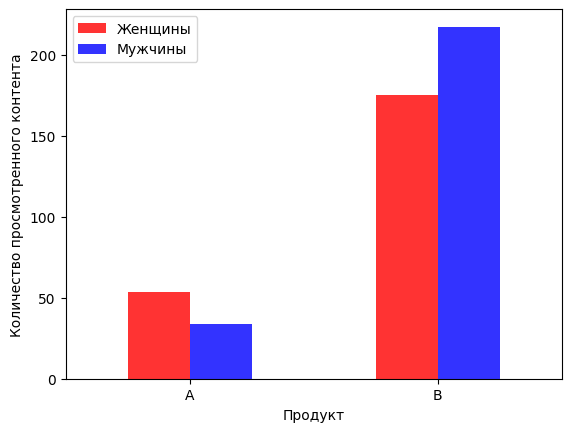

In [256]:
#Слайд 2


#рисуем график
table_mean_2 = pd.pivot_table(df_B_wins,values='Videos Watched',index='Subscription',columns='Gender', aggfunc='mean')

table_mean_2.plot(kind = 'bar', ylabel = 'Количество просмотренного контента', xlabel='Продукт', color = ['red', 'blue'], alpha = 0.8 )

plt.xticks(rotation=0)
plt.legend(['Женщины','Мужчины' ])
plt.show()

##Черный уровень

###Победа А

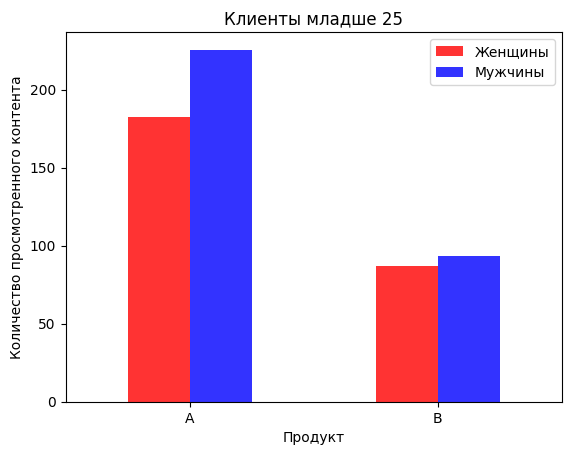

In [257]:
#Слайд 1


#рисуем график
table_mean_1 = pd.pivot_table(df_A_wins[df_A_wins['Age']=='<25'],values='Videos Watched',index='Subscription',columns='Gender', aggfunc='mean')
table_mean_1.plot(kind = 'bar', ylabel = 'Количество просмотренного контента', xlabel='Продукт', color = ['red', 'blue'], alpha = 0.8 )

plt.xticks(rotation=0)
plt.title('Клиенты младше 25')
plt.legend(['Женщины','Мужчины' ])
plt.show()

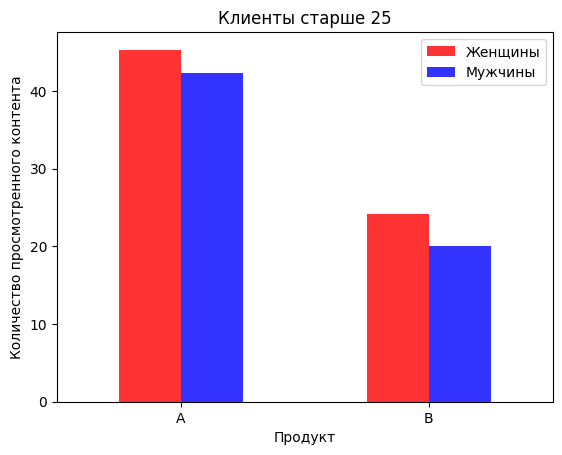

In [259]:
#рисуем график
table_mean_12 = pd.pivot_table(df_A_wins[df_A_wins['Age']=='25+'],values='Videos Watched',index='Subscription',columns='Gender', aggfunc='mean')
table_mean_12.plot(kind = 'bar', ylabel = 'Количество просмотренного контента', xlabel='Продукт', color = ['red', 'blue'], alpha = 0.8 )

plt.xticks(rotation=0)
plt.title('Клиенты старше 25')
plt.legend(['Женщины','Мужчины' ])
plt.show()

###Победа В

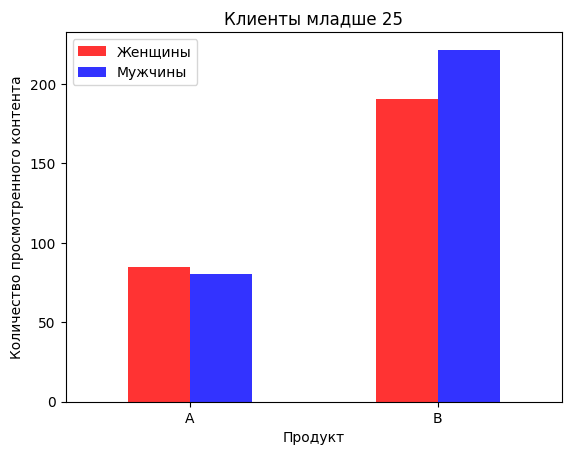

In [258]:
#Слайд 2


#рисуем график
table_mean_12 = pd.pivot_table(df_B_wins[df_B_wins['Age']=='<25'],values='Videos Watched',index='Subscription',columns='Gender', aggfunc='mean')
table_mean_12.plot(kind = 'bar', ylabel = 'Количество просмотренного контента', xlabel='Продукт', color = ['red', 'blue'], alpha = 0.8 )

plt.xticks(rotation=0)
plt.title('Клиенты младше 25')
plt.legend(['Женщины','Мужчины' ])
plt.show()

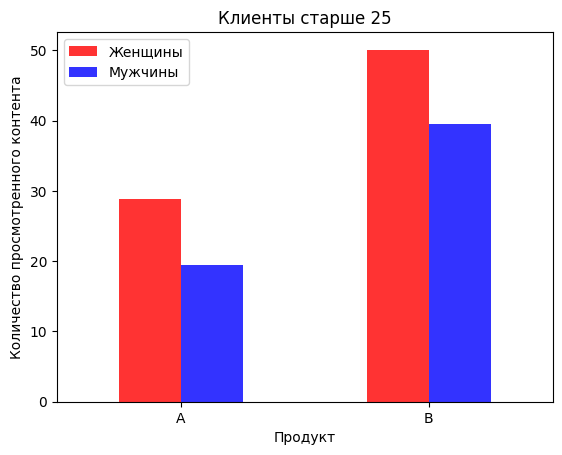

In [260]:
#Слайд 2


#рисуем график
table_mean_12 = pd.pivot_table(df_B_wins[df_B_wins['Age']=='25+'],values='Videos Watched',index='Subscription',columns='Gender', aggfunc='mean')
table_mean_12.plot(kind = 'bar', ylabel = 'Количество просмотренного контента', xlabel='Продукт', color = ['red', 'blue'], alpha = 0.8 )

plt.xticks(rotation=0)
plt.title('Клиенты старше 25')
plt.legend(['Женщины','Мужчины' ])
plt.show()